In [2]:
# Задача 1: Формулировка бизнес-постановки и ML-задачи

# 1.1. Бизнес-постановка задачи:
# В настоящий момент наблюдается рост конкуренции на рынке онлайн-торговли одеждой, в следствие чего существует необходимость оптимизации рекламных кампаний
# для повышения отклика пользователей. Задача заключается разработке модели, которая будет предсказывать вероятность того, что пользователь кликнет
# на рекламное объявление в интернет-магазине (кликнет/не кликнет). Это позволит более эффективно перераспределить рекламный бюджет.

# 1.2. Постановка ML-задачи:
# Задача бинарной классификации представляет собой распределение на 1 (пользователь кликнул) или 0 (пользователь не кликнул). Модель будет обучаться на наборе данных
# из открытых источников (Kaggle) за 2023-начало 2024 гг., содержащем множество характеристик пользователей и их взаимодействий с рекламными объявлениями.
# Набор данных:
# Для решения данной задачи будет использоваться набор данных, содержащий взаимодействия пользователей с рекламными объявлениями, доступный
# по ссылке: https://www.kaggle.com/datasets/sakshiandhale62442/seo-performance-data-urbanscape-apparel. Этот набор данных содержит данные о кликабельности на рекламу одежды
# за период 2023-начало 2024 годов с более, чем 40 столбцами, и почти в 10 000 строк. Набор включает такие характеристики, как: идентификатор пользователя,
# тип объявления, дата, CTR и другие показатели.

# Задача 2: Выбор метрики для измерения качества
# Для оценки качества будущей модели предлагаю использовать F1-меру в качестве основной метрики в связи с тем, что она представляет собой усредненный обобщающий показатель
# между precision и recall. Важно отметить необходимость правильного предсказания реальных кликов с избеганием случайных нажатий по рекламе, чтобы не «слить» рекламный бюджет
# на неэффективные показы, как говорят маркетологи. Именно по этой причине выбрана F1-мера, являющаяся оптимальной метрикой измерения качества.

In [4]:
# Задача 3: Провести предварительный разведочный анализ EDA на своих данных

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data.csv')
data.head()

,Date,Month,Year,Quarter,Time Of Day,Primary Keywords,Secondary Keywords,Long-Tail Keywords,Location,Social Media Source,...,Organic_Revenue ($),Page_Load_Time (sec),Core_Web_Vitals_LCP (sec),Core_Web_Vitals_FID (ms),Core_Web_Vitals_CLS,Social_Shares,Referral_Traffic,Technical_SEO_Errors,Bounce_Rate_by_Device_Mobile (%),Time_to_First_Byte_TTFB (ms)
0,1/1/2023 0:00,January,7/15/1905 0:00,Q1,Night,eco-friendly accessories,athleisure for eco-conscious consumers,sustainable fashion for athletes,Australia,YouTube,...,3597.90,2.87,2.70,448.84,0.30,247.0,2937.0,13.0,51.94,453.0
1,1/1/2023 1:00,January,7/15/1905 0:00,Q1,Night,recycled fabric dresses,eco-friendly sportswear,carbon-neutral activewear,United States,Instagram,...,5806.19,4.42,4.31,839.17,0.18,414.0,1909.0,19.0,56.62,437.0
2,1/1/2023 2:00,January,7/15/1905 0:00,Q1,Night,eco-friendly accessories,green fashion trends,biodegradable outdoor clothing,Canada,Instagram,...,1170.33,9.48,3.93,388.88,0.57,373.0,3059.0,7.0,49.62,1077.0
3,1/1/2023 3:00,January,7/15/1905 0:00,Q1,Night,eco-friendly accessories,sustainable activewear,carbon-neutral activewear,Australia,Instagram,...,1182.17,4.90,1.51,840.83,0.22,134.0,3264.0,7.0,50.74,1202.0
4,1/1/2023 4:00,January,7/15/1905 0:00,Q1,Night,eco-friendly clothing,athleisure for eco-conscious consumers,carbon-neutral activewear,Canada,Instagram,...,692.14,1.89,3.49,524.28,0.26,24.0,1631.0,14.0,67.05,313.0


In [5]:
# Базовая статистика
data.describe()
# Определенные выводы по результатам делать пока рано в связи с тем, что результат носит все равно несколько хаотичный и непонятный характер в связи с возможными выбросами, однако некоторые данные могут быть полезны уже сейчас, например:
# 1. Средняя кликабельность (CTR) на рекламу одежды составляет 5,3%, что говорит о том, что на 100 показов по рекламе переходят в среднем 5,3 раза, от чего можно отталкиваться при оценке рекламных кампаний
# 2. Органический трафик сайта (без платной рекламы) составляет от 100 до 7473 пользователей
# 3. При этом сайт располагается в результатах поисковой выдачи в диапазоне от 1 до 50 места, что будет важно при SEO-оптимизации сайта по ключевым словам
# 4. и другие выводы. Более тщательный анализ необходимо делать далее другими инструментами и методами.

,Organic_Traffic,Keywords_Ranking,Clicks,Impressions,CTR (%),Average_Position,Backlinks,Domain_Authority,Bounce_Rate (%),Pages_per_Session,...,Organic_Revenue ($),Page_Load_Time (sec),Core_Web_Vitals_LCP (sec),Core_Web_Vitals_FID (ms),Core_Web_Vitals_CLS,Social_Shares,Referral_Traffic,Technical_SEO_Errors,Bounce_Rate_by_Device_Mobile (%),Time_to_First_Byte_TTFB (ms)
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,...,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,5045.233994,50.091437,1531.737895,25490.645858,5.312674,25.185706,521.260904,49.671669,45.032627,5.437560,...,5038.863073,5.498887,2.996336,550.779003,0.555254,248.103741,2544.427471,9.483093,40.029462,797.597939
std,2837.551879,28.464475,849.025098,14097.992207,2.745068,14.211421,277.046032,23.220733,20.211599,2.607797,...,2873.147070,2.591526,1.153487,258.380412,0.259247,144.594102,1420.399650,5.763647,17.338028,404.750300
min,100.000000,1.000000,50.000000,1004.000000,0.500000,1.000000,50.000000,10.000000,10.030000,1.000000,...,101.470000,1.000000,1.000000,100.310000,0.100000,0.000000,50.000000,0.000000,10.000000,100.000000
25%,2579.500000,26.000000,806.000000,13474.500000,2.947500,12.610000,277.000000,30.000000,27.770000,3.150000,...,2536.270000,3.260000,2.000000,327.230000,0.330000,121.000000,1321.750000,4.000000,24.957500,446.000000
50%,5091.000000,50.000000,1534.000000,25343.000000,5.350000,24.945000,521.000000,50.000000,45.250000,5.390000,...,5094.800000,5.500000,3.020000,551.290000,0.560000,248.000000,2558.000000,10.000000,40.165000,792.000000
75%,7473.000000,75.000000,2273.000000,37763.250000,7.720000,37.560000,763.000000,70.000000,62.640000,7.670000,...,7487.325000,7.750000,3.980000,773.415000,0.780000,373.000000,3766.000000,15.000000,55.080000,1148.000000
max,9999.000000,99.000000,2999.000000,49999.000000,10.000000,50.000000,999.000000,89.000000,80.000000,10.000000,...,9999.770000,10.000000,5.000000,999.940000,1.000000,499.000000,4999.000000,19.000000,70.000000,1499.000000


In [6]:
# Проверка на пропущенные значения
data.isnull().sum()
# Вывод: пропущенных значений нет, можно работать со всеми данными в таблице, а в ее корректировке нет необходимости.

,0
Date,1
Month,1
Year,1
Quarter,1
Time Of Day,1
Primary Keywords,1
Secondary Keywords,1
Long-Tail Keywords,1
Location,1
Social Media Source,1


In [7]:
# Проверка типов данных
data.dtypes
# Вывод: таблица состоит из двух типов данных - object и float64, что удобно для проведения анализа

,0
Date,object
Month,object
Year,object
Quarter,object
Time Of Day,object
Primary Keywords,object
Secondary Keywords,object
Long-Tail Keywords,object
Location,object
Social Media Source,object


In [8]:
# Визуализация
# Распределение наиболее важных для анализа показателей
def create_countplot(x, data, ax, title, x_label, y_label):
  sns.countplot(x=x, data=data, ax=ax)
  ax.set_title(title)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)

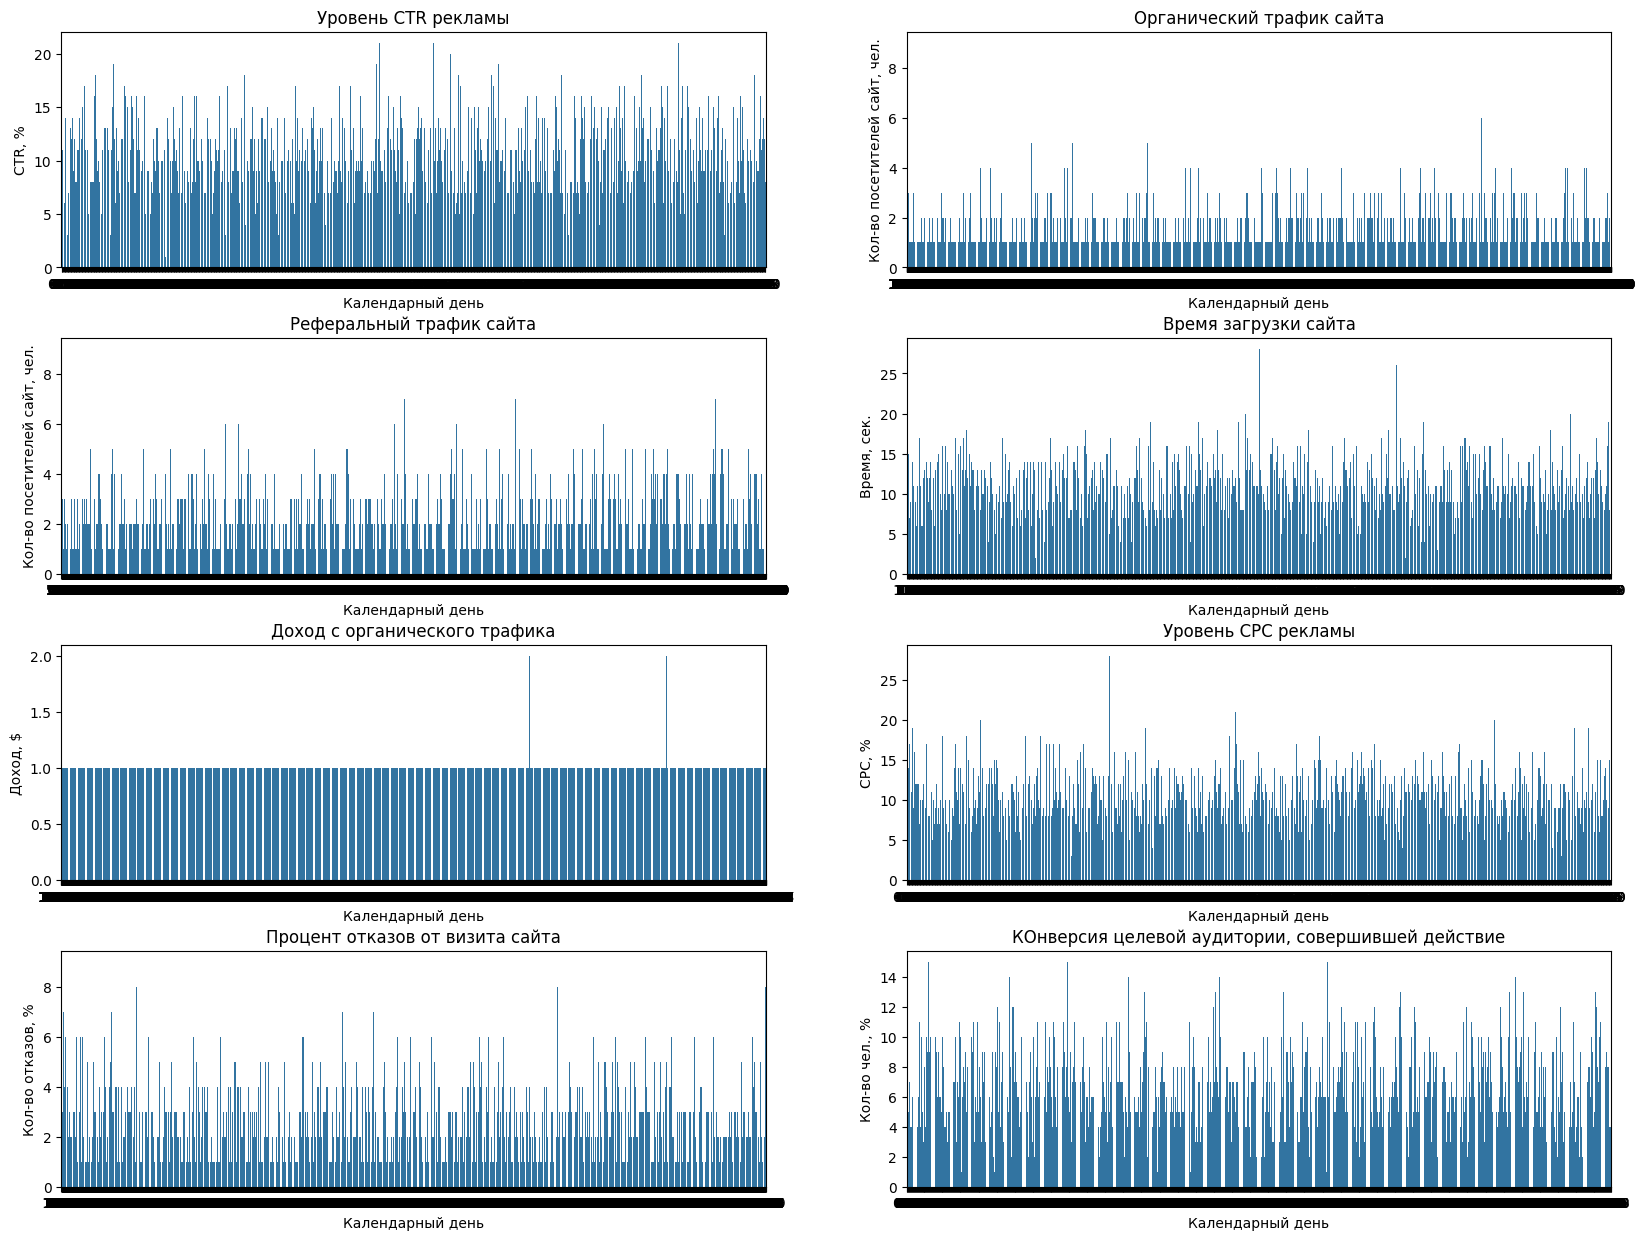

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(20, 15))
plt.subplots_adjust(hspace=0.3)
create_countplot(x='CTR (%)', data=data, ax=axes[0, 0], title='Уровень CTR рекламы', x_label='Календарный день', y_label='CTR, %')
create_countplot(x='Organic_Traffic', data=data, ax=axes[0, 1], title='Органический трафик сайта', x_label='Календарный день', y_label='Кол-во посетителей сайт, чел.')
create_countplot(x='Referral_Traffic', data=data, ax=axes[1, 0], title='Реферальный трафик сайта', x_label='Календарный день', y_label='Кол-во посетителей сайт, чел.')
create_countplot(x='Page_Load_Time (sec)', data=data, ax=axes[1, 1], title='Время загрузки сайта', x_label='Календарный день', y_label='Время, сек.')
create_countplot(x='Organic_Revenue ($)', data=data, ax=axes[2, 0], title='Доход с органического трафика', x_label='Календарный день', y_label='Доход, $')
create_countplot(x='CPC_for_Paid_Keywords ($)', data=data, ax=axes[2, 1], title='Уровень CPC рекламы', x_label='Календарный день', y_label='CPC, %')
create_countplot(x='Exit_Rate (%)', data=data, ax=axes[3, 0], title='Процент отказов от визита сайта', x_label='Календарный день', y_label='Кол-во отказов, %')
create_countplot(x='Conversion_Rate (%)', data=data, ax=axes[3, 1], title='КОнверсия целевой аудитории, совершившей действие', x_label='Календарный день', y_label='Кол-во чел., %')
# Изучение распределения наиболее важых показателей даст возможность определения наиболее результативных дней/действий/событий, которые можно учитывать
# при разработке новой рекламной кампании в будущем для оптимизации расходования рекламного бюджета, что напрямую связано с предсказаниями разрабатываемой ML-модели
# и уровнем ее эффективности при последующей оценке. Именно поэтому была произведена визуализация указанных параметров.